### Preparing final data 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
churn = pd.read_csv("C:/Users/PC HP 1/Desktop/2025-03-21/cleaned_churn_data.csv", low_memory=False)
bundle = pd.read_csv("C:/Users/PC HP 1/Desktop/2025-03-21/cleaned_data_bundle_purchase_ooredoo.csv")
monthly = pd.read_csv("C:/Users/PC HP 1/Desktop/2025-03-21/cleaned_MONTHLY_AGGREGATION_SAMPLE.csv")
socio = pd.read_csv("C:/Users/PC HP 1/Desktop/2025-03-21/cleaned_socio-demographic_sample_churn.csv")

# Convert subscriber_id to int after loading
churn['subscriber_id'] = churn['subscriber_id'].astype('int64')
bundle['subscriber_id'] = bundle['subscriber_id'].astype('int64')
monthly['subscriber_id'] = monthly['subscriber_id'].astype('int64')
socio['subscriber_id'] = socio['subscriber_id'].astype('int64')


# Use inner join to reduce memory usage
df = churn.merge(bundle, on='subscriber_id', how='inner') \
          .merge(monthly, on='subscriber_id', how='inner') \
          .merge(socio, on='subscriber_id', how='inner')

# Save merged file
# merged_df.to_csv(r"C:/Users/PC HP 1/Desktop/2025-03-21/merged_for_ml.csv", index=False)

# === Basic Info ===
print(" Shape of data:", df.shape)
print("\n Column names:\n", df.columns.tolist())
print("\n📄 Data types and null values:")
print(df.info())

# === Null values ===
print("\n Missing values per column:\n", df.isnull().sum())

# === Descriptive Statistics ===
print("\n Descriptive stats for numeric columns:\n", df.describe())

 Shape of data: (5318686, 55)

 Column names:
 ['churn', 'classe_anciennete', 'subscriber_id', 'msisdn_x', 'date_activation', 'churn_date', 'first_call_date', 'last_call_date', 'first_recharge_date', 'first_recharge_amount', 'last_international_call_date', 'original_operator', 'dat_attrib_kridi', 'dat_remb_kridi_net', 'SelectionProb', 'SamplingWeight', 'has_international_call', 'has_kridi', 'has_called', 'has_recharged', 'original_operator_binary', 'tenure_in_days', 'days_since_activation', 'anciennete_encoded', 'revenu_furfait_data_dinar_moyen', 'msisdn_y', 'device_type', 'flag_smartphone', 'data_trafic_volume_missing_flag', 'total_voice_revenu_amount_missing_flag', 'total_data_revenu_amount_missing_flag', 'recharge_amount_moyen', 'number_of_recharges_moyen', 'number_of_sms_onnet_moyen', 'number_of_sms_offnet_moyen', 'number_of_sms_international_moyen', 'mou_onnet_moyen', 'mou_offnet_mobile_moyen', 'mou_offnet_fix_moyen', 'mou_international_moyen', 'bonus_on_consumption_revenue_moyen'

In [30]:
df.duplicated().sum()

4922154

In [31]:
# If you want to modify the same df directly
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated().sum()

0

In [33]:
# Create aggregated features

# Total SMS
df["total_sms_moyen"] = (
    df["number_of_sms_onnet_moyen"] +
    df["number_of_sms_offnet_moyen"] +
    df["number_of_sms_international_moyen"]
)

# Total Minutes of Use (MOU)
df["total_mou_moyen"] = (
    df["mou_onnet_moyen"] +
    df["mou_offnet_mobile_moyen"] +
    df["mou_offnet_fix_moyen"] +
    df["mou_international_moyen"]
)

# Total Bonus Revenue
df["total_bonus_moyen"] = (
    df["bonus_on_consumption_revenue_moyen"] +
    df["bonus_on_refill_revenue_moyen"] +
    df["bonus_on_refill_flash_revenue_moyen"]
)

# Total Revenue (Voice + Data)
df["total_revenue_moyen"] = (
    df["total_voice_revenu_amount_moyen"] +
    df["total_data_revenu_amount_moyen"]
)

# Drop the detailed columns now that we have the totals
cols_to_drop = [
    "number_of_sms_onnet_moyen",
    "number_of_sms_offnet_moyen",
    "number_of_sms_international_moyen",
    "mou_onnet_moyen",
    "mou_offnet_mobile_moyen",
    "mou_offnet_fix_moyen",
    "mou_international_moyen",
    "bonus_on_consumption_revenue_moyen",
    "bonus_on_refill_revenue_moyen",
    "bonus_on_refill_flash_revenue_moyen",
    "total_voice_revenu_amount_moyen",
    "total_data_revenu_amount_moyen"
]

df = df.drop(columns=cols_to_drop)

# Check remaining columns
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['churn', 'classe_anciennete', 'subscriber_id', 'msisdn_x', 'date_activation', 'churn_date', 'first_call_date', 'last_call_date', 'first_recharge_date', 'first_recharge_amount', 'last_international_call_date', 'original_operator', 'dat_attrib_kridi', 'dat_remb_kridi_net', 'SelectionProb', 'SamplingWeight', 'has_international_call', 'has_kridi', 'has_called', 'has_recharged', 'original_operator_binary', 'tenure_in_days', 'days_since_activation', 'anciennete_encoded', 'revenu_furfait_data_dinar_moyen', 'msisdn_y', 'device_type', 'flag_smartphone', 'data_trafic_volume_missing_flag', 'total_voice_revenu_amount_missing_flag', 'total_data_revenu_amount_missing_flag', 'recharge_amount_moyen', 'number_of_recharges_moyen', 'number_of_reactivations_moyen', 'consumption_revenue_moyen', 'arpu_out_without_bonus_moyen', 'incoming_revenue_moyen', 'data_trafic_volume_moyen', 'msisdn', 'age', 'marital_status', 'gender', 'customer_language', 'total_sms_moyen', 'total_mou_moyen', 'tota

In [34]:
# Liste des colonnes à supprimer
cols_to_drop = [
    "data_trafic_volume_missing_flag",
    "total_voice_revenu_amount_missing_flag",
    "total_data_revenu_amount_missing_flag",
    "SelectionProb",
    "SamplingWeight",
    "first_call_date",
    "last_call_date",
    "first_recharge_date",
    "last_international_call_date",
    "dat_attrib_kridi",
    "dat_remb_kridi_net",
    "date_activation",
    "churn_date",
    "first_recharge_amount",
    "device_type"
]

# Suppression des colonnes
df = df.drop(columns=cols_to_drop)

# Vérification
print("Colonnes restantes :", df.columns.tolist())

Colonnes restantes : ['churn', 'classe_anciennete', 'subscriber_id', 'msisdn_x', 'original_operator', 'has_international_call', 'has_kridi', 'has_called', 'has_recharged', 'original_operator_binary', 'tenure_in_days', 'days_since_activation', 'anciennete_encoded', 'revenu_furfait_data_dinar_moyen', 'msisdn_y', 'flag_smartphone', 'recharge_amount_moyen', 'number_of_recharges_moyen', 'number_of_reactivations_moyen', 'consumption_revenue_moyen', 'arpu_out_without_bonus_moyen', 'incoming_revenue_moyen', 'data_trafic_volume_moyen', 'msisdn', 'age', 'marital_status', 'gender', 'customer_language', 'total_sms_moyen', 'total_mou_moyen', 'total_bonus_moyen', 'total_revenue_moyen']


In [35]:
df = df.drop(columns=["msisdn_x", "msisdn_y", "msisdn"])

In [36]:
#check for unique values in columns
print(df['anciennete_encoded'].unique())

[0 3 1 2 4]


In [37]:
churn_by_class = df.groupby('anciennete_encoded')['churn'].mean().sort_values(ascending=False)
print(churn_by_class)

anciennete_encoded
2    0.097169
3    0.063335
1    0.030232
4    0.022351
0    0.000000
Name: churn, dtype: float64


In [38]:
#drop 'classe_anciennete' as 'anciennete_encoded' is more informative
df = df.drop(columns=['classe_anciennete'])
#drop 'original_operator' as 'operator_encoded' is more informative
df = df.drop(columns=['original_operator'])

In [39]:
import numpy as np

# Columns that may contain '-' as unknown
cols_with_unknown = [ 'flag_smartphone']

# Replace '-' with NaN
df[cols_with_unknown] = df[cols_with_unknown].replace('-', np.nan)

# Option 1: Drop rows with NaN in these columns
df = df.dropna(subset=cols_with_unknown)

# Option 2: Or fill them with a specific category like 'Unknown' instead of dropping
# df[cols_with_unknown] = df[cols_with_unknown].fillna('Unknown')

# Check the result
for col in cols_with_unknown:
    print(f"Unique values in '{col}' after cleaning: {df[col].unique()}")


Unique values in 'flag_smartphone' after cleaning: ['Y' 'N']


In [40]:
#check the unique values for the columns
columns_to_check = [
    'flag_smartphone',
    'marital_status', 
    'gender', 
    'customer_language'
]

for col in columns_to_check:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print(f"Total unique values: {df[col].nunique()}")
    print("-" * 40)

Unique values in 'flag_smartphone':
['Y' 'N']
Total unique values: 2
----------------------------------------
Unique values in 'marital_status':
['Celibataire' 'Marie' 'Divorce' 'Veuf']
Total unique values: 4
----------------------------------------
Unique values in 'gender':
['M' 'F']
Total unique values: 2
----------------------------------------
Unique values in 'customer_language':
['Français' 'Anglais' 'Arabe' 'Italien']
Total unique values: 4
----------------------------------------


In [41]:
df['flag_smartphone'] = df['flag_smartphone'].map({'Y': 1, 'N': 0})

In [42]:
df['gender'] = df['gender'].map({'M': 0, 'F': 1})

In [19]:
print("Colonnes restantes :", df.columns.tolist())

Colonnes restantes : ['churn', 'subscriber_id', 'has_international_call', 'has_kridi', 'has_called', 'has_recharged', 'original_operator_binary', 'tenure_in_days', 'days_since_activation', 'anciennete_encoded', 'revenu_furfait_data_dinar_moyen', 'flag_smartphone', 'recharge_amount_moyen', 'number_of_recharges_moyen', 'number_of_reactivations_moyen', 'consumption_revenue_moyen', 'arpu_out_without_bonus_moyen', 'incoming_revenue_moyen', 'data_trafic_volume_moyen', 'age', 'marital_status', 'gender', 'customer_language', 'total_sms_moyen', 'total_mou_moyen', 'total_bonus_moyen', 'total_revenue_moyen']


In [43]:
df['marital_status'] = df['marital_status'].map({
    'Celibataire': 0,
    'Divorce': 1,
    'Marie': 2,
    'Veuf': 3
})

df['customer_language'] = df['customer_language'].map({
    'Anglais': 0,
    'Arabe': 1,
    'Français': 2,
    'Italien': 3
})

In [44]:
#check the unique values for the columns
columns_to_check = [
    'marital_status', 
    'customer_language'
]

for col in columns_to_check:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print(f"Total unique values: {df[col].nunique()}")
    print("-" * 40)

Unique values in 'marital_status':
[0 2 1 3]
Total unique values: 4
----------------------------------------
Unique values in 'customer_language':
[2 0 1 3]
Total unique values: 4
----------------------------------------


In [46]:
# Convert all boolean columns to integers 0/1
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Check the first row
print(df.head())


   churn  subscriber_id  has_international_call  has_kridi  has_called  \
0      0     2180606151                       0          0           1   
1      0     2180606151                       0          0           1   
2      0     2180583701                       0          0           1   
3      0     2180583701                       0          0           1   
4      0     2180582384                       0          0           1   

   has_recharged  original_operator_binary  tenure_in_days  \
0              0                         1             175   
1              0                         1             175   
2              1                         1             234   
3              1                         1             234   
4              1                         1             234   

   days_since_activation  anciennete_encoded  ...  incoming_revenue_moyen  \
0                    175                   0  ...               1286.5800   
1                    175    

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your merged dataframe after inner join
print("\n Column names:\n", df.columns.tolist())
df.head(1)


 Column names:
 ['churn', 'subscriber_id', 'has_international_call', 'has_kridi', 'has_called', 'has_recharged', 'original_operator_binary', 'tenure_in_days', 'days_since_activation', 'anciennete_encoded', 'revenu_furfait_data_dinar_moyen', 'flag_smartphone', 'recharge_amount_moyen', 'number_of_recharges_moyen', 'number_of_reactivations_moyen', 'consumption_revenue_moyen', 'arpu_out_without_bonus_moyen', 'incoming_revenue_moyen', 'data_trafic_volume_moyen', 'age', 'marital_status', 'gender', 'customer_language', 'total_sms_moyen', 'total_mou_moyen', 'total_bonus_moyen', 'total_revenue_moyen']


,churn,subscriber_id,has_international_call,has_kridi,has_called,has_recharged,original_operator_binary,tenure_in_days,days_since_activation,anciennete_encoded,...,incoming_revenue_moyen,data_trafic_volume_moyen,age,marital_status,gender,customer_language,total_sms_moyen,total_mou_moyen,total_bonus_moyen,total_revenue_moyen
0,0,2180606151,0,0,1,0,1,175,175,0,...,1286.58,5.841061e+09,42.0,0,0,2,1.0,5830.0,0.0,5167.945


In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 246608 entries, 0 to 5318665
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   churn                            246608 non-null  int64  
 1   subscriber_id                    246608 non-null  int64  
 2   has_international_call           246608 non-null  int64  
 3   has_kridi                        246608 non-null  int64  
 4   has_called                       246608 non-null  int64  
 5   has_recharged                    246608 non-null  int64  
 6   original_operator_binary         246608 non-null  int64  
 7   tenure_in_days                   246608 non-null  int64  
 8   days_since_activation            246608 non-null  int64  
 9   anciennete_encoded               246608 non-null  int64  
 10  revenu_furfait_data_dinar_moyen  246608 non-null  float64
 11  flag_smartphone                  246608 non-null  int64  
 12  rechar

In [53]:
df.duplicated().sum()

0

In [54]:
# If you want to modify the same df directly
df.drop_duplicates(inplace=True)

In [55]:
# Save the cleaned DataFrame to a CSV file
df.to_csv("main_dataset_ooredoo.csv", index=False)

print("Dataset saved successfully as 'cleaned_dataset.csv'")

Dataset saved successfully as 'cleaned_dataset.csv'


### Final work 

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\PC HP 1\Desktop\main_dataset_ooredoo.csv")


In [2]:
df = df.drop('tenure_in_days', axis=1)

In [3]:
df.head()

,churn,subscriber_id,has_international_call,has_kridi,has_called,has_recharged,original_operator_binary,days_since_activation,anciennete_encoded,revenu_furfait_data_dinar_moyen,...,incoming_revenue_moyen,data_trafic_volume_moyen,age,marital_status,gender,customer_language,total_sms_moyen,total_mou_moyen,total_bonus_moyen,total_revenue_moyen
0,0,2180606151,0,0,1,0,1,175,0,25.0,...,1286.5800,5.841061e+09,42.0,0,0,2,1.0,5830.0,0.0,5167.9450
1,0,2180583701,0,0,1,1,1,234,0,3.7,...,41.4750,3.785459e+08,50.0,0,0,0,2.0,240.0,0.0,2031.4750
2,0,2180582384,0,0,1,1,1,234,0,1.0,...,50.7675,3.977999e+08,30.0,0,1,1,5.0,9330.0,0.0,7743.2675
3,0,2180668914,0,0,1,1,1,227,0,5.0,...,15.1780,6.567287e+08,52.0,0,0,2,1.0,1080.0,0.0,4252.6780
4,0,2180581894,0,0,1,0,1,234,0,0.0,...,41.4750,5.800420e+09,40.0,0,0,1,0.5,0.0,0.0,0.0000


In [4]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246608 entries, 0 to 246607
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   churn                            246608 non-null  int64  
 1   subscriber_id                    246608 non-null  int64  
 2   has_international_call           246608 non-null  int64  
 3   has_kridi                        246608 non-null  int64  
 4   has_called                       246608 non-null  int64  
 5   has_recharged                    246608 non-null  int64  
 6   original_operator_binary         246608 non-null  int64  
 7   days_since_activation            246608 non-null  int64  
 8   anciennete_encoded               246608 non-null  int64  
 9   revenu_furfait_data_dinar_moyen  246608 non-null  float64
 10  flag_smartphone                  246608 non-null  int64  
 11  recharge_amount_moyen            246608 non-null  float64
 12  nu

In [5]:
print(df.describe())

               churn  subscriber_id  has_international_call      has_kridi  \
count  246608.000000   2.466080e+05           246608.000000  246608.000000   
mean        0.033158   1.868833e+09                0.011066       0.531507   
std         0.179049   7.409407e+08                0.104612       0.499007   
min         0.000000   2.420000e+02                0.000000       0.000000   
25%         0.000000   2.146221e+09                0.000000       0.000000   
50%         0.000000   2.164741e+09                0.000000       1.000000   
75%         0.000000   2.177869e+09                0.000000       1.000000   
max         1.000000   2.180692e+09                1.000000       1.000000   

          has_called  has_recharged  original_operator_binary  \
count  246608.000000  246608.000000             246608.000000   
mean        0.990106       0.934503                  0.979019   
std         0.098977       0.247401                  0.143320   
min         0.000000       0.000000  

In [6]:
df = df.drop('revenu_furfait_data_dinar_moyen', axis=1)

In [7]:
print(df.isnull().sum())

churn                            0
subscriber_id                    0
has_international_call           0
has_kridi                        0
has_called                       0
has_recharged                    0
original_operator_binary         0
days_since_activation            0
anciennete_encoded               0
flag_smartphone                  0
recharge_amount_moyen            0
number_of_recharges_moyen        0
number_of_reactivations_moyen    0
consumption_revenue_moyen        0
arpu_out_without_bonus_moyen     0
incoming_revenue_moyen           0
data_trafic_volume_moyen         0
age                              0
marital_status                   0
gender                           0
customer_language                0
total_sms_moyen                  0
total_mou_moyen                  0
total_bonus_moyen                0
total_revenue_moyen              0
dtype: int64


In [8]:
df.describe()

,churn,subscriber_id,has_international_call,has_kridi,has_called,has_recharged,original_operator_binary,days_since_activation,anciennete_encoded,flag_smartphone,...,incoming_revenue_moyen,data_trafic_volume_moyen,age,marital_status,gender,customer_language,total_sms_moyen,total_mou_moyen,total_bonus_moyen,total_revenue_moyen
count,246608.000000,2.466080e+05,246608.000000,246608.000000,246608.000000,246608.000000,246608.000000,246608.000000,246608.000000,246608.000000,...,246608.000000,2.466080e+05,246608.00000,246608.000000,246608.000000,246608.000000,246608.000000,246608.000000,246608.000000,246608.000000
mean,0.033158,1.868833e+09,0.011066,0.531507,0.990106,0.934503,0.979019,1862.297772,3.125669,0.848752,...,768.262277,3.742545e+09,41.55542,0.215987,0.241184,0.426965,7.412496,6083.455146,350.901309,7538.217963
std,0.179049,7.409407e+08,0.104612,0.499007,0.098977,0.247401,0.143320,1693.914411,1.048690,0.358291,...,794.676322,4.036121e+09,13.46679,0.620830,0.427803,0.724020,6.694945,6246.276043,482.221090,5655.690446
min,0.000000,2.420000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,175.000000,0.000000,0.000000,...,0.000000,0.000000e+00,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.146221e+09,0.000000,0.000000,1.000000,1.000000,1.000000,471.000000,2.000000,1.000000,...,88.482143,3.266553e+08,31.00000,0.000000,0.000000,0.000000,1.400000,668.571429,0.000000,2506.565179
50%,0.000000,2.164741e+09,0.000000,1.000000,1.000000,1.000000,1.000000,1262.000000,4.000000,1.000000,...,464.049714,1.914365e+09,41.00000,0.000000,0.000000,0.000000,5.285714,3565.714286,0.000000,6814.109830
75%,0.000000,2.177869e+09,0.000000,1.000000,1.000000,1.000000,1.000000,2680.000000,4.000000,1.000000,...,1285.952607,6.600231e+09,51.00000,0.000000,0.000000,1.000000,12.714286,10722.178571,854.285714,11683.369170
max,1.000000,2.180692e+09,1.000000,1.000000,1.000000,1.000000,1.000000,6029.000000,4.000000,1.000000,...,2490.210000,1.129758e+10,84.00000,3.000000,1.000000,3.000000,20.000000,18980.000000,1150.000000,21911.960625


Continuous columns: ['recharge_amount_moyen', 'number_of_recharges_moyen', 'number_of_reactivations_moyen', 'consumption_revenue_moyen', 'arpu_out_without_bonus_moyen', 'incoming_revenue_moyen', 'data_trafic_volume_moyen', 'age', 'total_sms_moyen', 'total_mou_moyen', 'total_bonus_moyen', 'total_revenue_moyen']

=== Outliers per column ===
age: 705 outliers
recharge_amount_moyen: 0 outliers
number_of_recharges_moyen: 0 outliers
number_of_reactivations_moyen: 0 outliers
consumption_revenue_moyen: 0 outliers
arpu_out_without_bonus_moyen: 0 outliers
incoming_revenue_moyen: 0 outliers
data_trafic_volume_moyen: 0 outliers
total_sms_moyen: 0 outliers
total_mou_moyen: 0 outliers
total_bonus_moyen: 0 outliers
total_revenue_moyen: 0 outliers


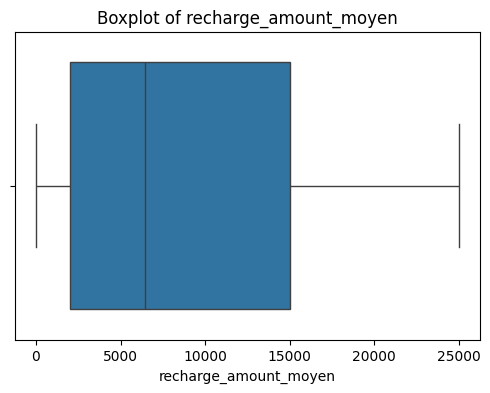

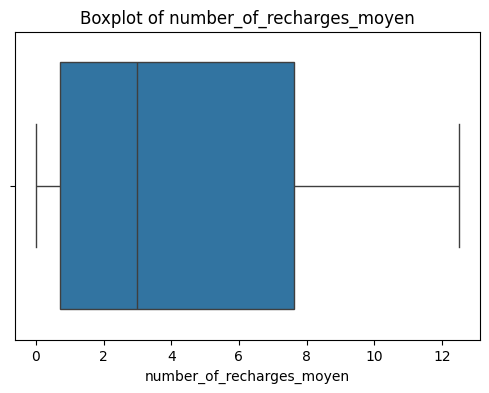

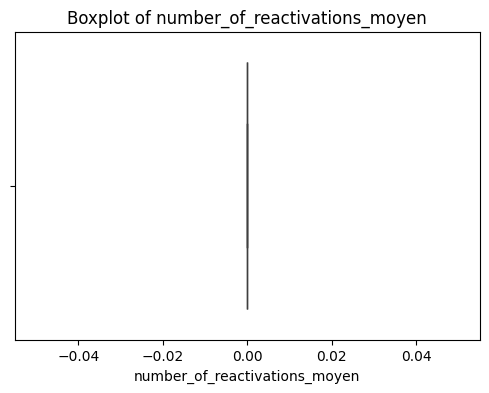

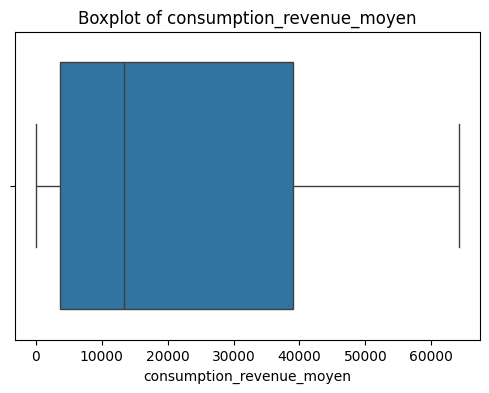

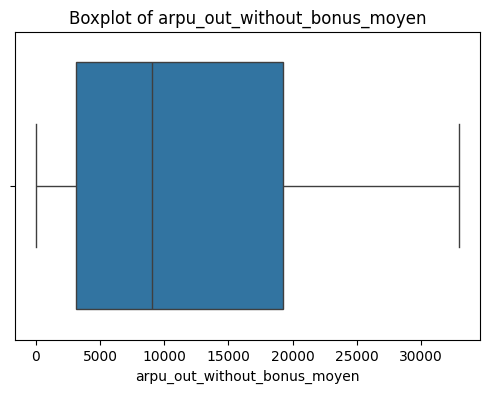

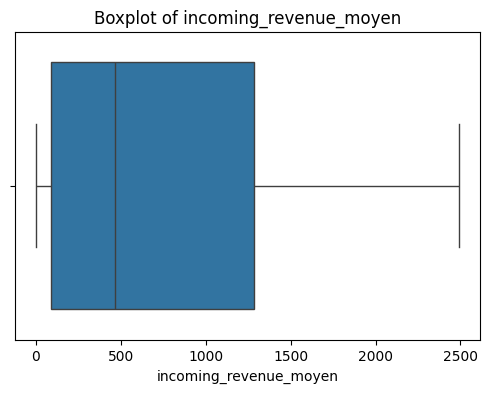

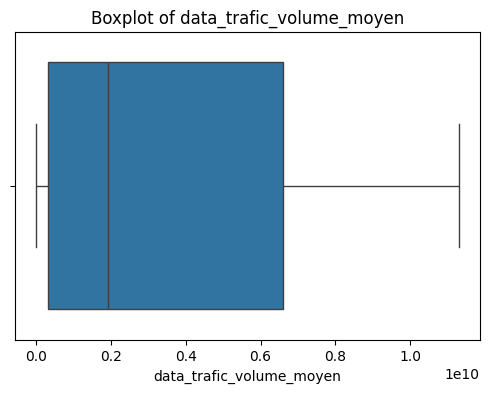

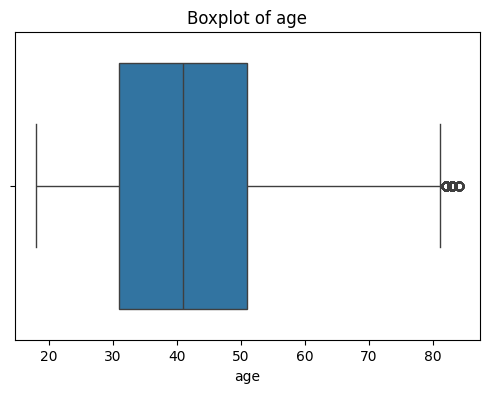

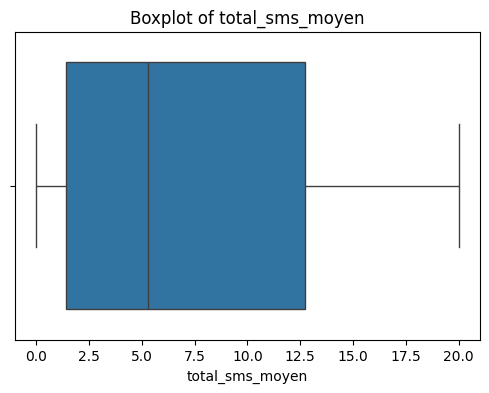

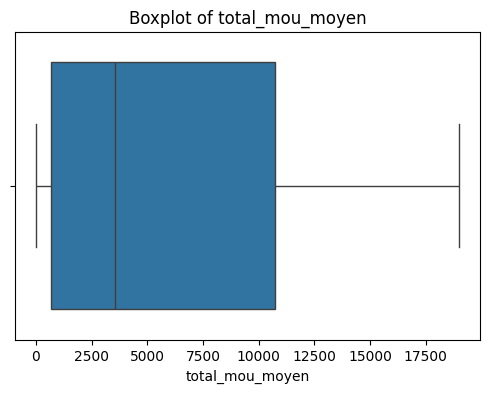

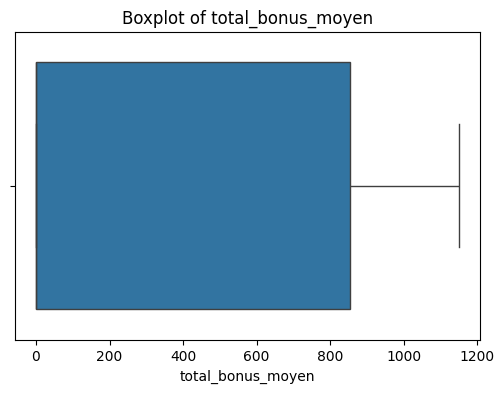

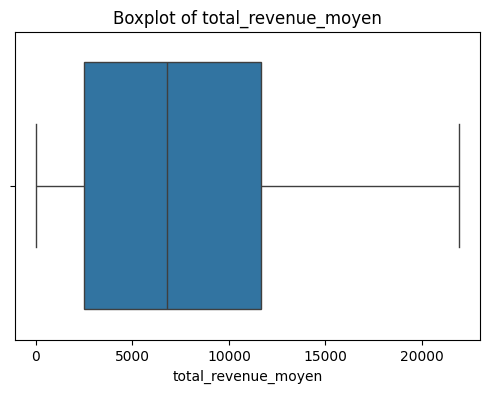

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Select only continuous (float) columns
float_cols = df.select_dtypes(include=['float64']).columns
print("Continuous columns:", list(float_cols))

#  Detect outliers using IQR
outlier_summary = {}

for col in float_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Sort by most outliers
outlier_summary = dict(sorted(outlier_summary.items(), key=lambda x: x[1], reverse=True))

print("\n=== Outliers per column ===")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

#  Visualize distributions with boxplots
for col in float_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [10]:
import pandas as pd

df = df[(df['age'] >= 18) & (df['age'] <= 100)]

# Cap extreme but valid ages at 1st–99th percentile
df['age'] = df['age'].clip(
    lower=df['age'].quantile(0.01),
    upper=df['age'].quantile(0.99)
)



# === 3. (Optional) Verify after treatment ===
print("\nAfter fixing outliers:")
print("Age:", df['age'].describe())



After fixing outliers:
Age: count    246608.000000
mean         41.518041
std          13.344796
min          19.000000
25%          31.000000
50%          41.000000
75%          51.000000
max          75.000000
Name: age, dtype: float64


In [11]:
df.dropna(inplace=True)

Churn counts:
 churn
0    238431
1      8177
Name: count, dtype: int64

Churn percentage:
 churn
0    96.684211
1     3.315789
Name: proportion, dtype: float64


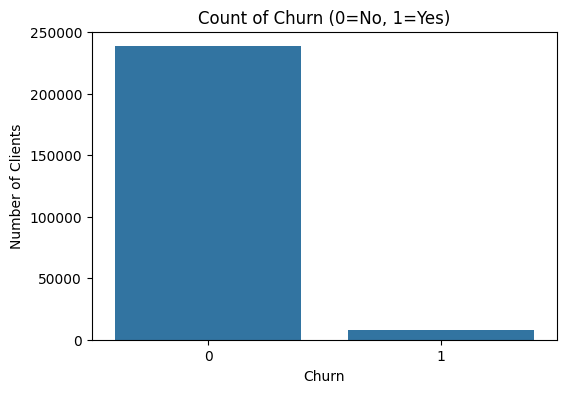

In [12]:
churn_counts = df['churn'].value_counts()
churn_percent = df['churn'].value_counts(normalize=True) * 100

print("Churn counts:\n", churn_counts)
print("\nChurn percentage:\n", churn_percent)

# Bar plot
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title("Count of Churn (0=No, 1=Yes)")
plt.xlabel("Churn")
plt.ylabel("Number of Clients")
plt.show()

Counts by classe_anciennete:
 anciennete_encoded
4    124225
3     55063
2     44313
1     20100
0      2907
Name: count, dtype: int64

Percentage by classe_anciennete:
 anciennete_encoded
4    50.373467
3    22.328148
2    17.969003
1     8.150587
0     1.178794
Name: proportion, dtype: float64


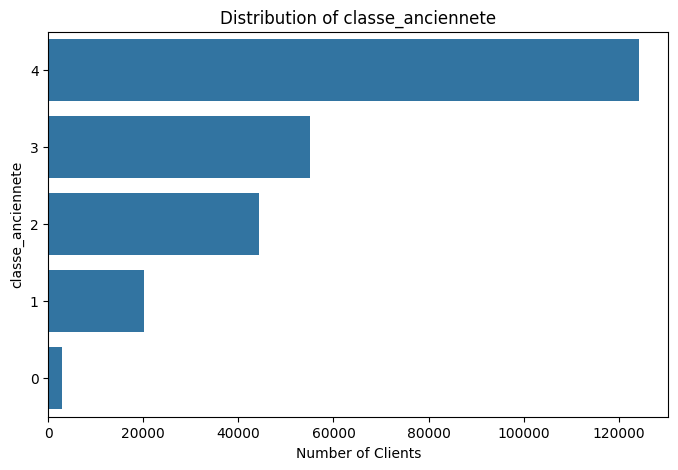

In [13]:
classe_counts = df['anciennete_encoded'].value_counts()
classe_percent = df['anciennete_encoded'].value_counts(normalize=True) * 100

print("Counts by classe_anciennete:\n", classe_counts)
print("\nPercentage by classe_anciennete:\n", classe_percent)

# Plot
plt.figure(figsize=(8,5))
sns.countplot(y='anciennete_encoded', data=df, order=classe_counts.index)
plt.title("Distribution of classe_anciennete")
plt.xlabel("Number of Clients")
plt.ylabel("classe_anciennete")
plt.show()

Counts by original_operator_binary:
 original_operator_binary
1    241434
0      5174
Name: count, dtype: int64

Percentage by original_operator_binary:
 original_operator_binary
1    97.901933
0     2.098067
Name: proportion, dtype: float64


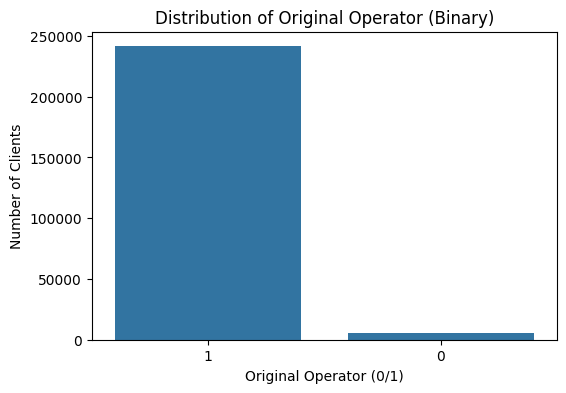

In [14]:
op_counts = df['original_operator_binary'].value_counts()
op_percent = df['original_operator_binary'].value_counts(normalize=True) * 100

print("Counts by original_operator_binary:\n", op_counts)
print("\nPercentage by original_operator_binary:\n", op_percent)

plt.figure(figsize=(6,4))
sns.countplot(x='original_operator_binary', data=df, order=op_counts.index)
plt.title("Distribution of Original Operator (Binary)")
plt.xlabel("Original Operator (0/1)")
plt.ylabel("Number of Clients")
plt.show()



Churn rate by anciennete_encoded (%):
 anciennete_encoded
2    8.313587
3    4.236965
1    2.671642
4    1.306500
0    0.000000
Name: churn, dtype: float64


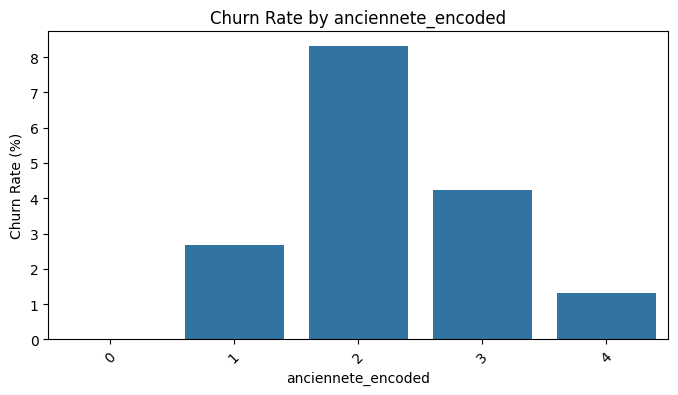


Churn rate by gender (%):
 gender
1    3.875382
0    3.137926
Name: churn, dtype: float64


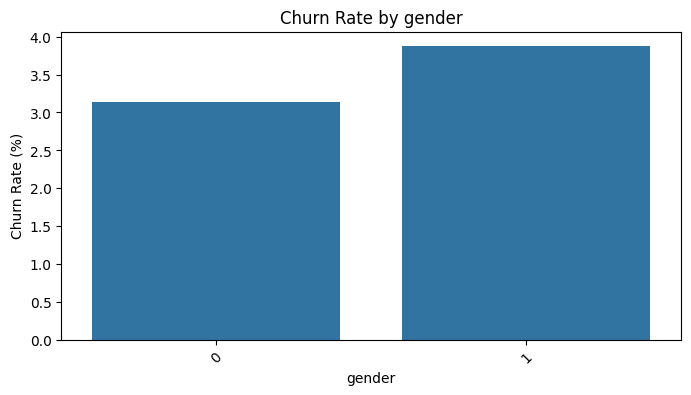


Churn rate by has_kridi (%):
 has_kridi
0    4.432461
1    2.331507
Name: churn, dtype: float64


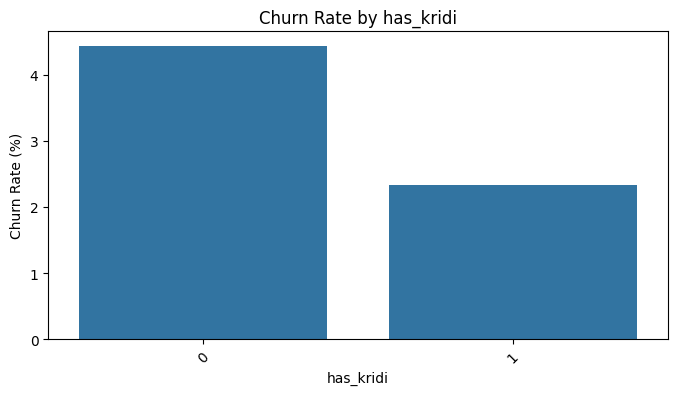

In [15]:
def plot_churn_rate(feature):
    churn_rate = df.groupby(feature)['churn'].mean() * 100
    churn_rate = churn_rate.sort_values(ascending=False)
    print(f"\nChurn rate by {feature} (%):\n", churn_rate)
    
    plt.figure(figsize=(8,4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f"Churn Rate by {feature}")
    plt.ylabel("Churn Rate (%)")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

for col in ['anciennete_encoded', 'gender', 'has_kridi']:
    plot_churn_rate(col)


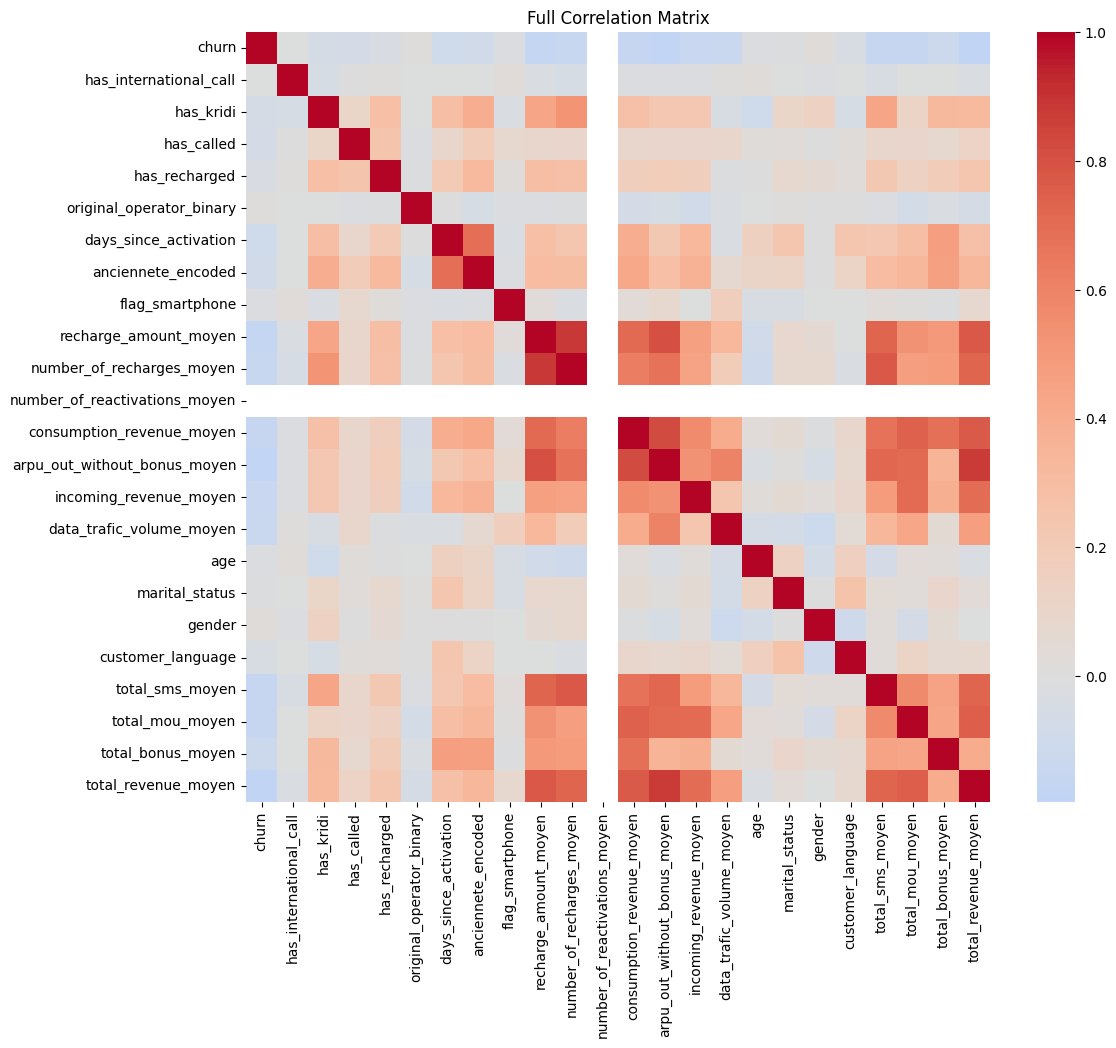

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Drop subscriber_id if it exists
if 'subscriber_id' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['subscriber_id'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Full Correlation Matrix')
plt.show()

In [17]:
print("\n Column names:\n", df.columns.tolist())
print(df.info())


 Column names:
 ['churn', 'subscriber_id', 'has_international_call', 'has_kridi', 'has_called', 'has_recharged', 'original_operator_binary', 'days_since_activation', 'anciennete_encoded', 'flag_smartphone', 'recharge_amount_moyen', 'number_of_recharges_moyen', 'number_of_reactivations_moyen', 'consumption_revenue_moyen', 'arpu_out_without_bonus_moyen', 'incoming_revenue_moyen', 'data_trafic_volume_moyen', 'age', 'marital_status', 'gender', 'customer_language', 'total_sms_moyen', 'total_mou_moyen', 'total_bonus_moyen', 'total_revenue_moyen']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246608 entries, 0 to 246607
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   churn                          246608 non-null  int64  
 1   subscriber_id                  246608 non-null  int64  
 2   has_international_call         246608 non-null  int64  
 3   has_kridi                      

In [18]:
import numpy as np

# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr_pairs = [column for column in upper.columns if any(upper[column] > 0.8)]

print("Columns to consider removing due to high correlation:")
print(high_corr_pairs)

Columns to consider removing due to high correlation:
['days_since_activation', 'number_of_recharges_moyen', 'arpu_out_without_bonus_moyen', 'total_revenue_moyen']


In [19]:
# Threshold for strong correlation
threshold = 0.8

# Identify highly correlated pairs
high_corr = [(i, j, corr_matrix.loc[i,j]) 
             for i in corr_matrix.columns for j in corr_matrix.columns 
             if i != j and abs(corr_matrix.loc[i,j]) > threshold]

# Remove duplicates (i,j) vs (j,i)
high_corr = list({tuple(sorted([i,j])) + (v,) for i,j,v in high_corr})

print("Highly correlated feature pairs (>|0.8|):")
for i, j, v in high_corr:
    print(f"{i} ↔ {j}: {v:.2f}")

Highly correlated feature pairs (>|0.8|):
days_since_activation ↔ subscriber_id: 0.84
arpu_out_without_bonus_moyen ↔ recharge_amount_moyen: 0.81
number_of_recharges_moyen ↔ recharge_amount_moyen: 0.88
arpu_out_without_bonus_moyen ↔ total_revenue_moyen: 0.88
arpu_out_without_bonus_moyen ↔ consumption_revenue_moyen: 0.82


In [20]:
import numpy as np

target_corr = {}
for col in ['number_of_recharges_moyen', 'recharge_amount_moyen',
            'arpu_out_without_bonus_moyen', 'total_revenue_moyen', 'consumption_revenue_moyen']:
    target_corr[col] = np.corrcoef(df[col], df['churn'])[0,1]

print("Correlation with churn:")
print(target_corr)


Correlation with churn:
{'number_of_recharges_moyen': -0.14984849843850528, 'recharge_amount_moyen': -0.16593187565894776, 'arpu_out_without_bonus_moyen': -0.1763937247037367, 'total_revenue_moyen': -0.1950169247986107, 'consumption_revenue_moyen': -0.16098874103646282}


In [21]:
from sklearn.ensemble import RandomForestClassifier

X = df[['number_of_recharges_moyen', 'recharge_amount_moyen',
        'arpu_out_without_bonus_moyen', 'total_revenue_moyen', 'consumption_revenue_moyen']]
y = df['churn']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = dict(zip(X.columns, model.feature_importances_))
print("Feature Importances:", importances)


Feature Importances: {'number_of_recharges_moyen': 0.08406071710720885, 'recharge_amount_moyen': 0.0984502340772318, 'arpu_out_without_bonus_moyen': 0.24764026193026428, 'total_revenue_moyen': 0.32618937047247026, 'consumption_revenue_moyen': 0.24365941641282485}


Feature Importances:
total_revenue_moyen             0.326189
arpu_out_without_bonus_moyen    0.247640
consumption_revenue_moyen       0.243659
recharge_amount_moyen           0.098450
number_of_recharges_moyen       0.084061
dtype: float64


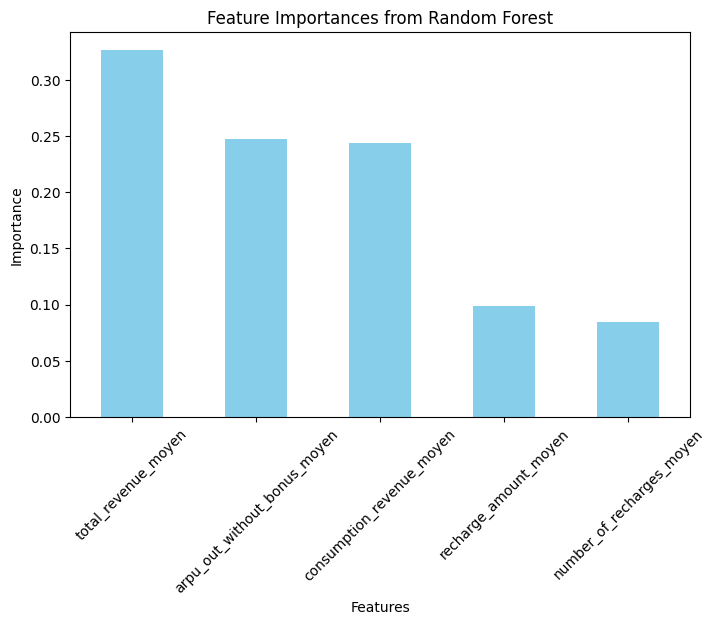

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Select features and target
X = df[['number_of_recharges_moyen', 'recharge_amount_moyen',
        'arpu_out_without_bonus_moyen', 'total_revenue_moyen', 'consumption_revenue_moyen']]
y = df['churn']

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances as a pandas Series (not a dict)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature Importances:")
print(importances)

# Plot feature importances
plt.figure(figsize=(8, 5))
importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()


In [23]:
# List of columns to drop
cols_to_drop = [
    'number_of_recharges_moyen',
    'arpu_out_without_bonus_moyen']

# Drop the columns from the dataframe
df = df.drop(columns=cols_to_drop)

# Check the remaining columns
print(df.columns)


Index(['churn', 'subscriber_id', 'has_international_call', 'has_kridi',
       'has_called', 'has_recharged', 'original_operator_binary',
       'days_since_activation', 'anciennete_encoded', 'flag_smartphone',
       'recharge_amount_moyen', 'number_of_reactivations_moyen',
       'consumption_revenue_moyen', 'incoming_revenue_moyen',
       'data_trafic_volume_moyen', 'age', 'marital_status', 'gender',
       'customer_language', 'total_sms_moyen', 'total_mou_moyen',
       'total_bonus_moyen', 'total_revenue_moyen'],
      dtype='object')


split train/test

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# === 1. Continuous columns ===
continuous_cols = [
    'recharge_amount_moyen',
    'number_of_reactivations_moyen',
    'consumption_revenue_moyen',
    'incoming_revenue_moyen',
    'data_trafic_volume_moyen',
    'age',
    'total_sms_moyen',
    'total_mou_moyen',
    'total_bonus_moyen',
    'total_revenue_moyen'
]

scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

print(df[continuous_cols].head())

   recharge_amount_moyen  number_of_reactivations_moyen  \
0              -1.107701                            0.0   
1              -0.860926                            0.0   
2              -0.120602                            0.0   
3              -0.367377                            0.0   
4              -1.107701                            0.0   

   consumption_revenue_moyen  incoming_revenue_moyen  \
0                   0.424696                0.652239   
1                  -0.918895               -0.914572   
2                  -0.660031               -0.902879   
3                  -0.819059               -0.947664   
4                  -1.007293               -0.914572   

   data_trafic_volume_moyen       age  total_sms_moyen  total_mou_moyen  \
0                  0.519935  0.036116        -0.957814        -0.040577   
1                 -0.833475  0.635602        -0.808447        -0.935512   
2                 -0.828704 -0.863113        -0.360347         0.519758   
3       

In [25]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['churn', 'subscriber_id'], axis=1)
y = df['churn']

In [26]:
# # Splitting the data into training and test sets, stratifying by the target variable 'churn'
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

## 5. Creating Two Datasets: Original and Undersampled

### 5.1 Original Dataset (Imbalanced)

In [27]:
# Original dataset (no resampling)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 5.2 Undersampled Dataset (Balanced via Undersampling)

In [28]:
# Separating majority and minority classes
df_minority = df[df['churn'] == 1]
df_majority = df[df['churn'] == 0]

# Downsampling majority class
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combining minority class with downsampled majority class
df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Splitting features and target
X_balanced = df_balanced.drop(['churn', 'subscriber_id'], axis=1)
y_balanced = df_balanced['churn']

# Train-test split on balanced data
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

### 6. Model Selection and Training

### 6.1 Logistic Regression

#### 6.1.1 On Original Dataset

Logistic Regression Report (Original Data):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     47687
           1       0.00      0.00      0.00      1635

    accuracy                           0.97     49322
   macro avg       0.48      0.50      0.49     49322
weighted avg       0.93      0.97      0.95     49322



C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

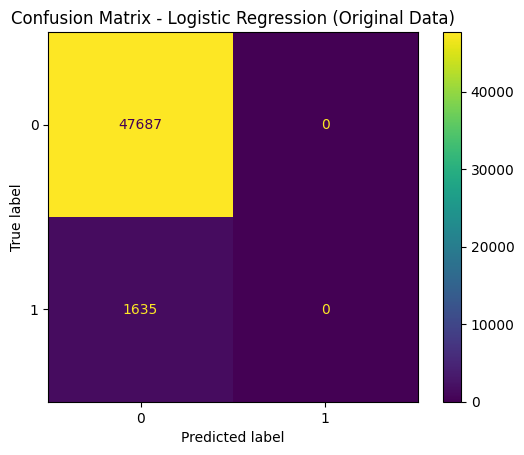

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train the model
logreg_orig = LogisticRegression(max_iter=1000)
logreg_orig.fit(X_train_orig, y_train_orig)

# Predictions
y_pred_lr_orig = logreg_orig.predict(X_test_orig)
lr_probs_orig = logreg_orig.predict_proba(X_test_orig)[:, 1]

# Evaluation Metrics
print("Logistic Regression Report (Original Data):")
print(classification_report(y_test_orig, y_pred_lr_orig))

# Confusion Matrix
cm_lr_orig = confusion_matrix(y_test_orig, y_pred_lr_orig)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_orig)
disp.plot()
plt.title('Confusion Matrix - Logistic Regression (Original Data)')
plt.show()


Logistic Regression Report (Undersampled Data):
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1636
           1       0.79      0.91      0.85      1635

    accuracy                           0.83      3271
   macro avg       0.84      0.83      0.83      3271
weighted avg       0.84      0.83      0.83      3271



C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


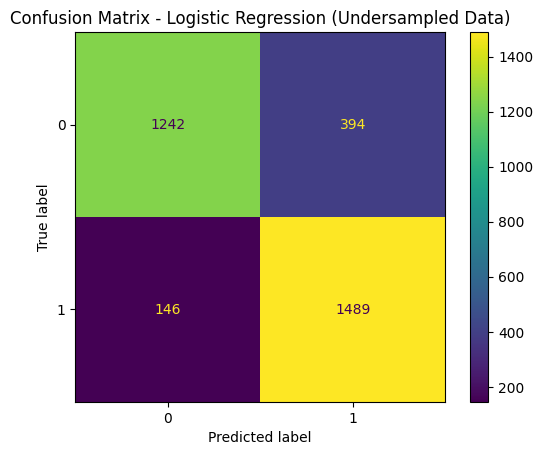

In [30]:
# Initialize and train the model
logreg_bal = LogisticRegression(max_iter=1000)
logreg_bal.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_lr_bal = logreg_bal.predict(X_test_bal)
lr_probs_bal = logreg_bal.predict_proba(X_test_bal)[:, 1]

# Evaluation Metrics
print("Logistic Regression Report (Undersampled Data):")
print(classification_report(y_test_bal, y_pred_lr_bal))

# Confusion Matrix
cm_lr_bal = confusion_matrix(y_test_bal, y_pred_lr_bal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_bal)
disp.plot()
plt.title('Confusion Matrix - Logistic Regression (Undersampled Data)')
plt.show()

### 6.2 Desicion Tree

Decision Tree Report (Original Data):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     47687
           1       0.00      0.00      0.00      1635

    accuracy                           0.97     49322
   macro avg       0.48      0.50      0.49     49322
weighted avg       0.93      0.97      0.95     49322



C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

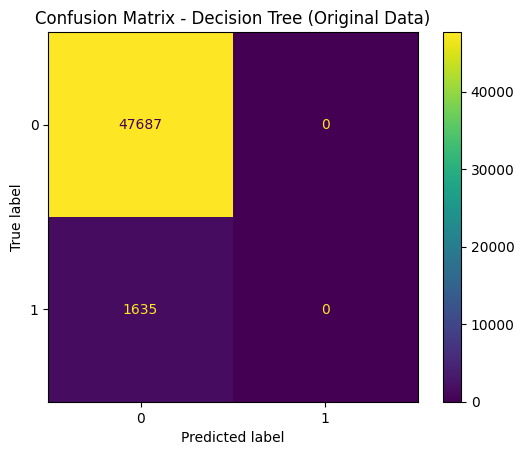

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model_orig = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)
dt_model_orig.fit(X_train_orig, y_train_orig)

# Predictions
y_pred_dt_orig = dt_model_orig.predict(X_test_orig)
dt_probs_orig = dt_model_orig.predict_proba(X_test_orig)[:, 1]

# Evaluation Metrics
print("Decision Tree Report (Original Data):")
print(classification_report(y_test_orig, y_pred_dt_orig))

# Confusion Matrix
cm_dt_orig = confusion_matrix(y_test_orig, y_pred_dt_orig)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt_orig)
disp.plot()
plt.title('Confusion Matrix - Decision Tree (Original Data)')
plt.show()

Decision Tree Report (Undersampled Data):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1636
           1       0.82      0.85      0.84      1635

    accuracy                           0.83      3271
   macro avg       0.83      0.83      0.83      3271
weighted avg       0.83      0.83      0.83      3271



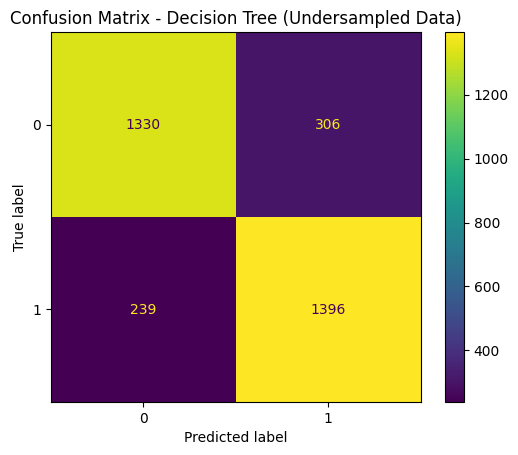

In [32]:
# Initialize and train the model
dt_model_bal = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)
dt_model_bal.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_dt_bal = dt_model_bal.predict(X_test_bal)
dt_probs_bal = dt_model_bal.predict_proba(X_test_bal)[:, 1]

# Evaluation Metrics
print("Decision Tree Report (Undersampled Data):")
print(classification_report(y_test_bal, y_pred_dt_bal))

# Confusion Matrix
cm_dt_bal = confusion_matrix(y_test_bal, y_pred_dt_bal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt_bal)
disp.plot()
plt.title('Confusion Matrix - Decision Tree (Undersampled Data)')
plt.show()


### 6.3 Random Forest Classifier

#### 6.3.1 On Original Dataset

Random Forest Report (Original Data):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     47687
           1       0.78      0.33      0.46      1635

    accuracy                           0.97     49322
   macro avg       0.88      0.66      0.73     49322
weighted avg       0.97      0.97      0.97     49322



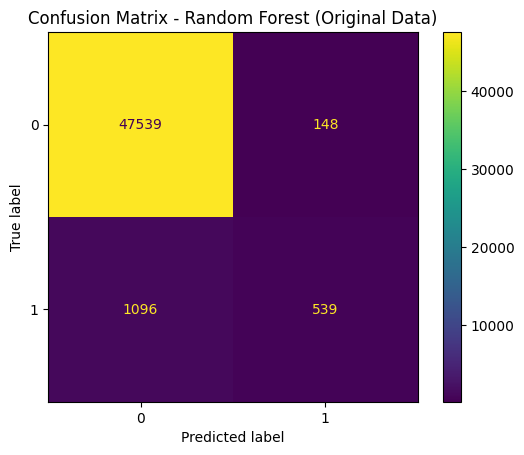

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model_orig = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_orig.fit(X_train_orig, y_train_orig)

# Predictions
y_pred_rf_orig = rf_model_orig.predict(X_test_orig)
rf_probs_orig = rf_model_orig.predict_proba(X_test_orig)[:, 1]

# Evaluation Metrics
print("Random Forest Report (Original Data):")
print(classification_report(y_test_orig, y_pred_rf_orig))

# Confusion Matrix
cm_rf_orig = confusion_matrix(y_test_orig, y_pred_rf_orig)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_orig)
disp.plot()
plt.title('Confusion Matrix - Random Forest (Original Data)')
plt.show()

#### 6.3.2 On Undersampled Dataset

Random Forest Report (Undersampled Data):
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1636
           1       0.88      0.93      0.91      1635

    accuracy                           0.90      3271
   macro avg       0.90      0.90      0.90      3271
weighted avg       0.90      0.90      0.90      3271



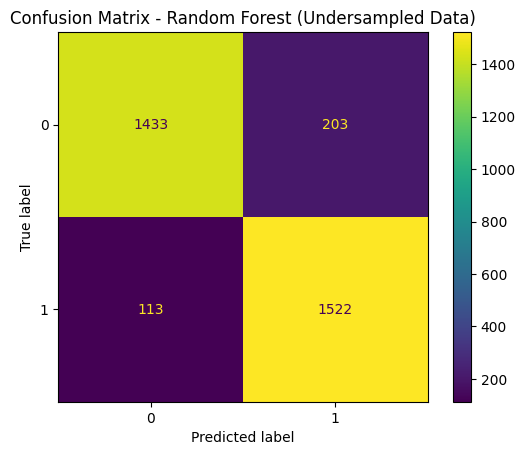

In [34]:
# Initialize and train the model
rf_model_bal = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_bal.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_rf_bal = rf_model_bal.predict(X_test_bal)
rf_probs_bal = rf_model_bal.predict_proba(X_test_bal)[:, 1]

# Evaluation Metrics
print("Random Forest Report (Undersampled Data):")
print(classification_report(y_test_bal, y_pred_rf_bal))

# Confusion Matrix
cm_rf_bal = confusion_matrix(y_test_bal, y_pred_rf_bal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_bal)
disp.plot()
plt.title('Confusion Matrix - Random Forest (Undersampled Data)')
plt.show()

### 6.4 AdaBoost Classifier

In [35]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost Classifier Report (Original Data):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     47687
           1       0.00      0.00      0.00      1635

    accuracy                           0.97     49322
   macro avg       0.48      0.50      0.49     49322
weighted avg       0.93      0.97      0.95     49322



C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

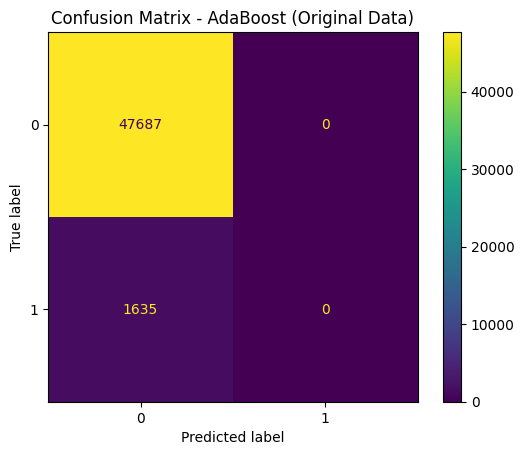

In [36]:
# Initialize and train the model
abc_model_orig = AdaBoostClassifier(random_state=42)
abc_model_orig.fit(X_train_orig, y_train_orig)

# Predictions
y_pred_abc_orig = abc_model_orig.predict(X_test_orig)
abc_probs_orig = abc_model_orig.predict_proba(X_test_orig)[:, 1]

# Evaluation Metrics
print("AdaBoost Classifier Report (Original Data):")
print(classification_report(y_test_orig, y_pred_abc_orig))

# Confusion Matrix
cm_abc_orig = confusion_matrix(y_test_orig, y_pred_abc_orig)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_abc_orig)
disp.plot()
plt.title('Confusion Matrix - AdaBoost (Original Data)')
plt.show()


AdaBoost Classifier Report (Undersampled Data):
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1636
           1       0.79      0.94      0.86      1635

    accuracy                           0.84      3271
   macro avg       0.85      0.84      0.84      3271
weighted avg       0.85      0.84      0.84      3271



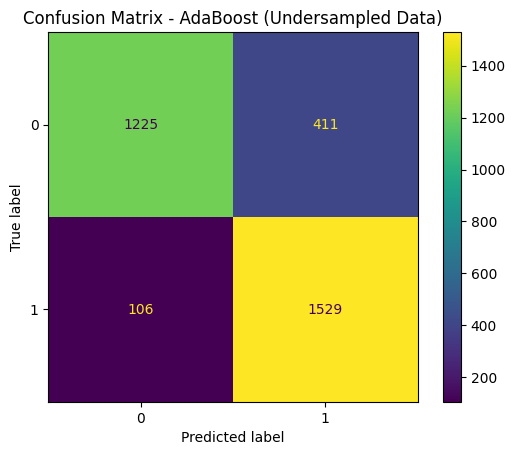

In [37]:
# Initialize and train the model
abc_model_bal = AdaBoostClassifier(random_state=42)
abc_model_bal.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_abc_bal = abc_model_bal.predict(X_test_bal)
abc_probs_bal = abc_model_bal.predict_proba(X_test_bal)[:, 1]

# Evaluation Metrics
print("AdaBoost Classifier Report (Undersampled Data):")
print(classification_report(y_test_bal, y_pred_abc_bal))

# Confusion Matrix
cm_abc_bal = confusion_matrix(y_test_bal, y_pred_abc_bal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_abc_bal)
disp.plot()
plt.title('Confusion Matrix - AdaBoost (Undersampled Data)')
plt.show()


### 6.5 Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

Gradient Boosting Report (Original Data):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     47687
           1       0.67      0.14      0.23      1635

    accuracy                           0.97     49322
   macro avg       0.82      0.57      0.61     49322
weighted avg       0.96      0.97      0.96     49322



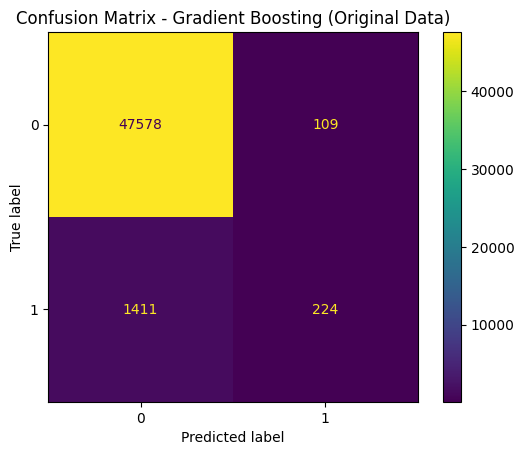

In [39]:
# Initialize and train the model
gbc_model_orig = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_model_orig.fit(X_train_orig, y_train_orig)

# Predictions
y_pred_gbc_orig = gbc_model_orig.predict(X_test_orig)
gbc_probs_orig = gbc_model_orig.predict_proba(X_test_orig)[:, 1]

# Evaluation Metrics
print("Gradient Boosting Report (Original Data):")
print(classification_report(y_test_orig, y_pred_gbc_orig))

# Confusion Matrix
cm_gbc_orig = confusion_matrix(y_test_orig, y_pred_gbc_orig)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbc_orig)
disp.plot()
plt.title('Confusion Matrix - Gradient Boosting (Original Data)')
plt.show()

Gradient Boosting Report (Undersampled Data):
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1636
           1       0.85      0.93      0.89      1635

    accuracy                           0.89      3271
   macro avg       0.89      0.89      0.88      3271
weighted avg       0.89      0.89      0.88      3271



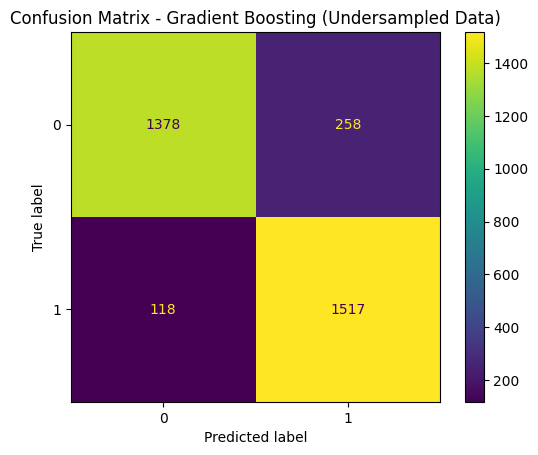

In [40]:
# Initialize and train the model
gbc_model_bal = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_model_bal.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_gbc_bal = gbc_model_bal.predict(X_test_bal)
gbc_probs_bal = gbc_model_bal.predict_proba(X_test_bal)[:, 1]

# Evaluation Metrics
print("Gradient Boosting Report (Undersampled Data):")
print(classification_report(y_test_bal, y_pred_gbc_bal))

# Confusion Matrix
cm_gbc_bal = confusion_matrix(y_test_bal, y_pred_gbc_bal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbc_bal)
disp.plot()
plt.title('Confusion Matrix - Gradient Boosting (Undersampled Data)')
plt.show()

### 6.6 XGBoost Classifier

In [41]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from xgboost import XGBClassifier

C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:12:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Report (Original Data):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     47687
           1       0.66      0.29      0.40      1635

    accuracy                           0.97     49322
   macro avg       0.82      0.64      0.69     49322
weighted avg       0.97      0.97      0.97     49322



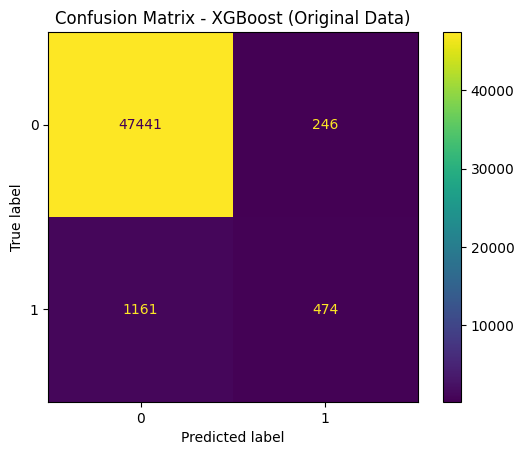

In [43]:
# Initialize and train the model
xgb_model_orig = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model_orig.fit(X_train_orig, y_train_orig)

# Predictions
y_pred_xgb_orig = xgb_model_orig.predict(X_test_orig)
xgb_probs_orig = xgb_model_orig.predict_proba(X_test_orig)[:, 1]

# Evaluation Metrics
print("XGBoost Report (Original Data):")
print(classification_report(y_test_orig, y_pred_xgb_orig))

# Confusion Matrix
cm_xgb_orig = confusion_matrix(y_test_orig, y_pred_xgb_orig)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_orig)
disp.plot()
plt.title('Confusion Matrix - XGBoost (Original Data)')
plt.show()

C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:12:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Report (Undersampled Data):
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1636
           1       0.89      0.93      0.91      1635

    accuracy                           0.91      3271
   macro avg       0.91      0.91      0.91      3271
weighted avg       0.91      0.91      0.91      3271



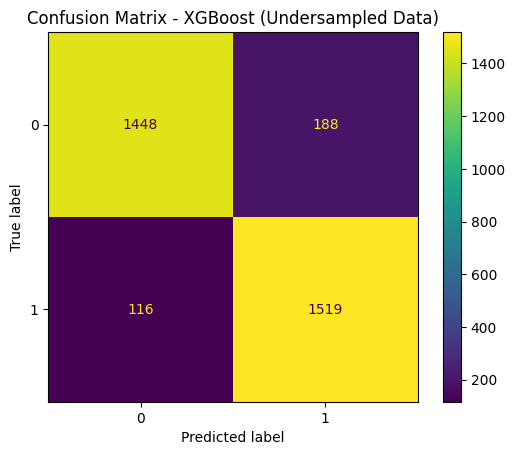

In [44]:
# Initialize and train the model
xgb_model_bal = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model_bal.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_xgb_bal = xgb_model_bal.predict(X_test_bal)
xgb_probs_bal = xgb_model_bal.predict_proba(X_test_bal)[:, 1]

# Evaluation Metrics
print("XGBoost Report (Undersampled Data):")
print(classification_report(y_test_bal, y_pred_xgb_bal))

# Confusion Matrix
cm_xgb_bal = confusion_matrix(y_test_bal, y_pred_xgb_bal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_bal)
disp.plot()
plt.title('Confusion Matrix - XGBoost (Undersampled Data)')
plt.show()

### 7. Model Evaluation and Comparison

In [45]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,   
    ConfusionMatrixDisplay
)


In [46]:
# List to store evaluation metrics
metrics_list = []

# Function to compute metrics
def compute_metrics(y_test, y_pred, y_probs, dataset, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']
    metrics_list.append({
        'Dataset': dataset,
        'Model': model_name,
        'Accuracy': accuracy,
        'AUC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Compute metrics for all models on all datasets
# Logistic Regression
compute_metrics(y_test_orig, y_pred_lr_orig, lr_probs_orig, 'Original', 'Logistic Regression')
compute_metrics(y_test_bal, y_pred_lr_bal, lr_probs_bal, 'Undersampled', 'Logistic Regression')

# Decision Tree
compute_metrics(y_test_orig, y_pred_dt_orig, dt_probs_orig, 'Original', 'Decision Tree')
compute_metrics(y_test_bal, y_pred_dt_bal, dt_probs_bal, 'Undersampled', 'Decision Tree')

# Random Forest
compute_metrics(y_test_orig, y_pred_rf_orig, rf_probs_orig, 'Original', 'Random Forest')
compute_metrics(y_test_bal, y_pred_rf_bal, rf_probs_bal, 'Undersampled', 'Random Forest')

# AdaBoost
compute_metrics(y_test_orig, y_pred_abc_orig, abc_probs_orig, 'Original', 'AdaBoost')
compute_metrics(y_test_bal, y_pred_abc_bal, abc_probs_bal, 'Undersampled', 'AdaBoost')

# Gradient Boosting
compute_metrics(y_test_orig, y_pred_gbc_orig, gbc_probs_orig, 'Original', 'Gradient Boosting')
compute_metrics(y_test_bal, y_pred_gbc_bal, gbc_probs_bal, 'Undersampled', 'Gradient Boosting')

# XGBoost
compute_metrics(y_test_orig, y_pred_xgb_orig, xgb_probs_orig, 'Original', 'XGBoost')
compute_metrics(y_test_bal, y_pred_xgb_bal, xgb_probs_bal, 'Undersampled', 'XGBoost')


C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC HP 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

### 7.2 Creating a DataFrame of Metrics

In [47]:
# Create DataFrame
metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df[['Dataset', 'Model', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1-Score']]
np.round(metrics_df,2)

,Dataset,Model,Accuracy,AUC,Precision,Recall,F1-Score
0,Original,Logistic Regression,0.97,0.89,0.00,0.00,0.00
1,Undersampled,Logistic Regression,0.83,0.90,0.79,0.91,0.85
2,Original,Decision Tree,0.97,0.82,0.00,0.00,0.00
3,Undersampled,Decision Tree,0.83,0.86,0.82,0.85,0.84
4,Original,Random Forest,0.97,0.96,0.78,0.33,0.46
5,Undersampled,Random Forest,0.90,0.96,0.88,0.93,0.91
6,Original,AdaBoost,0.97,0.90,0.00,0.00,0.00
7,Undersampled,AdaBoost,0.84,0.91,0.79,0.94,0.86
8,Original,Gradient Boosting,0.97,0.94,0.67,0.14,0.23
9,Undersampled,Gradient Boosting,0.89,0.95,0.85,0.93,0.89


### 7.3 Visualizing Performance

#### 7.3.1 Bar Plot of Accuracy

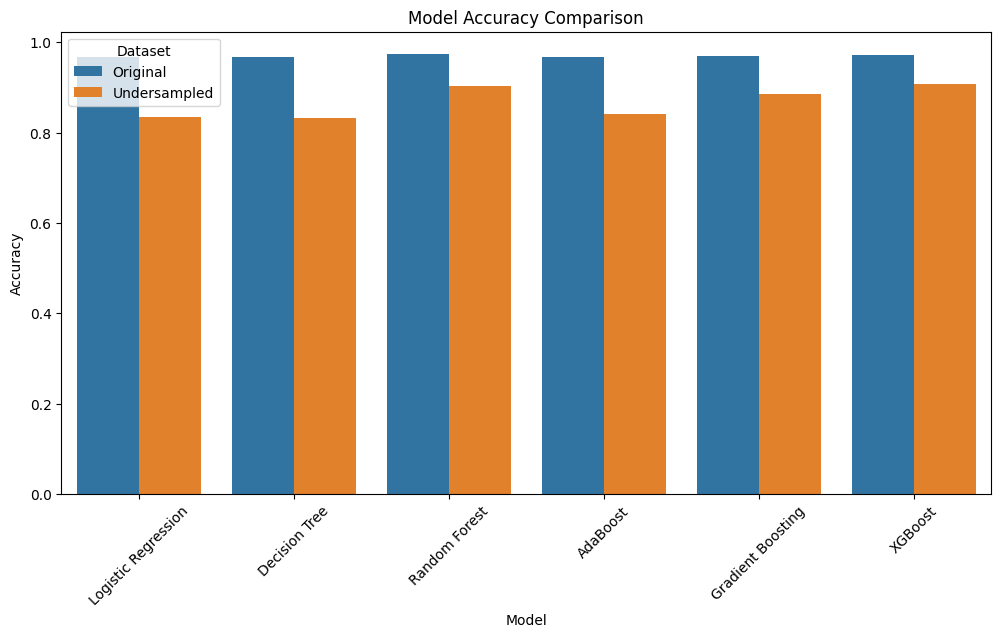

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df, x='Model', y='Accuracy', hue='Dataset')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()

#### 7.3.2 Bar Plot of AUC

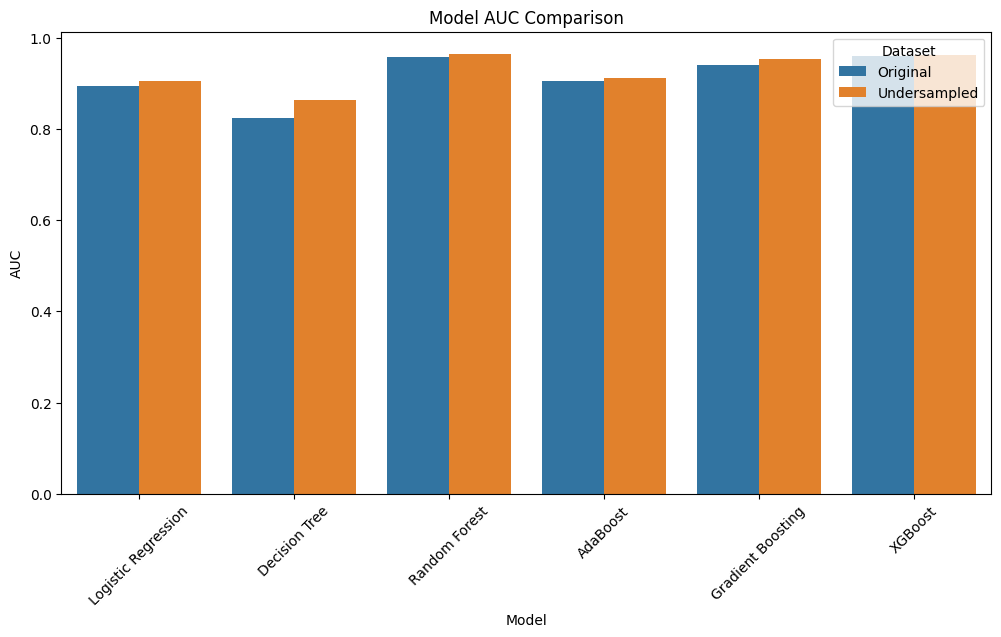

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df, x='Model', y='AUC', hue='Dataset')
plt.title('Model AUC Comparison')
plt.ylabel('AUC')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()

#### 7.3.3 ROC Curve Comparison

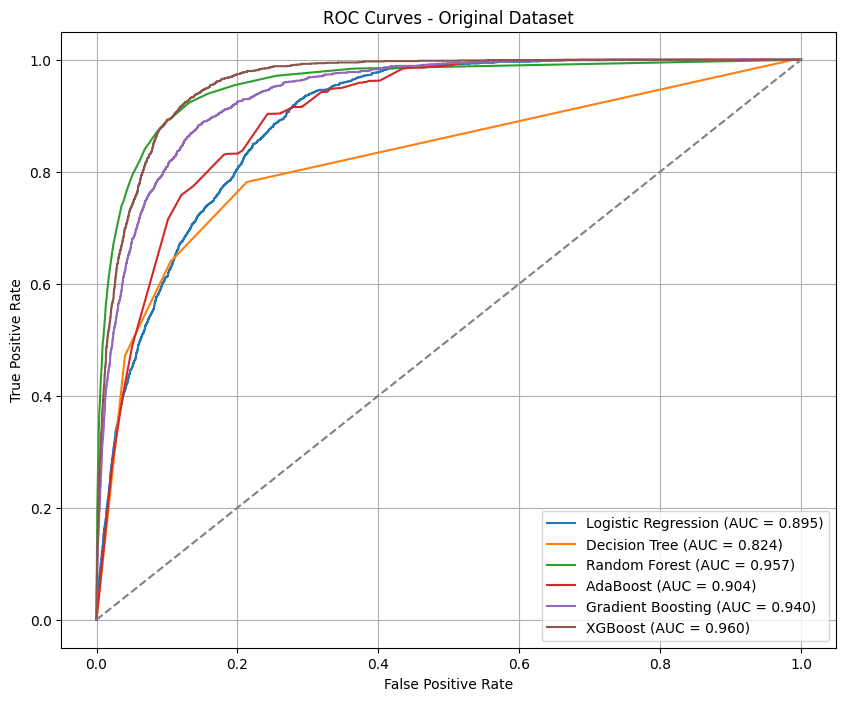

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Plot ROC Curves for Original Dataset
plt.figure(figsize=(10, 8))

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
probs_orig = [lr_probs_orig, dt_probs_orig, rf_probs_orig, abc_probs_orig, gbc_probs_orig, xgb_probs_orig]

for model_name, probs in zip(model_names, probs_orig):
    auc = roc_auc_score(y_test_orig, probs)
    fpr, tpr, _ = roc_curve(y_test_orig, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curves - Original Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


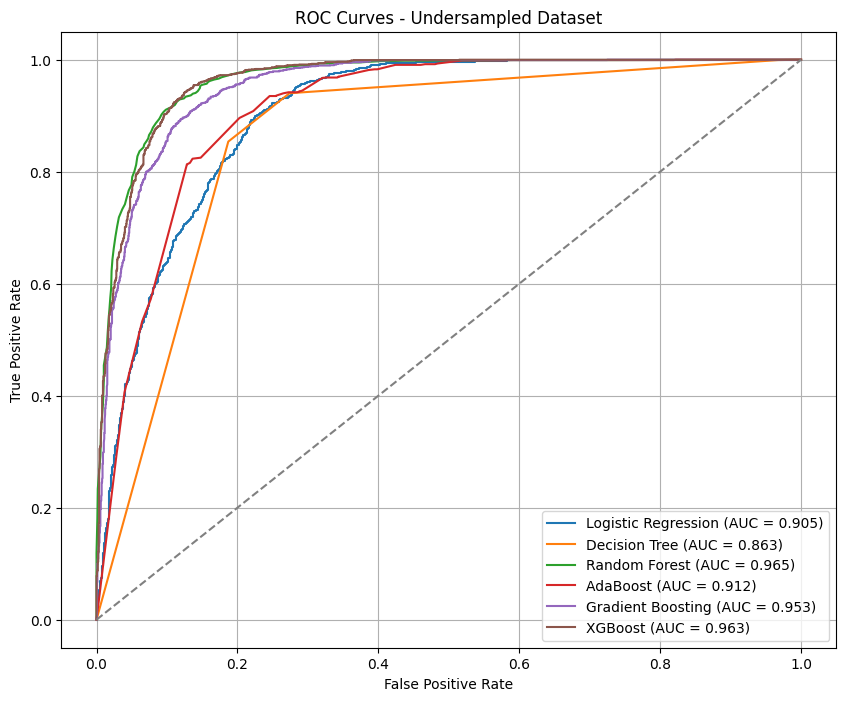

In [51]:
# Plot ROC Curves for Undersampled Dataset
plt.figure(figsize=(10, 8))
probs_bal = [lr_probs_bal, dt_probs_bal, rf_probs_bal, abc_probs_bal, gbc_probs_bal, xgb_probs_bal]

for model_name, probs in zip(model_names, probs_bal):
    auc = roc_auc_score(y_test_bal, probs)
    fpr, tpr, _ = roc_curve(y_test_bal, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curves - Undersampled Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

## 8. Evaluating Feature Importance

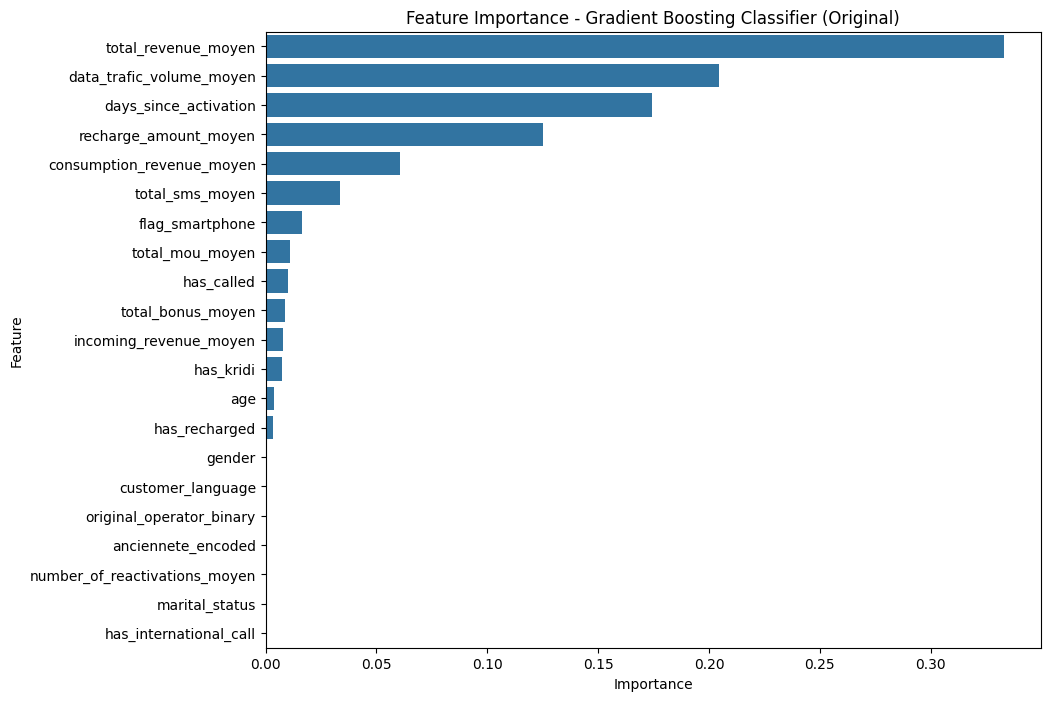

In [53]:
importances = gbc_model_orig.feature_importances_
feature_names = X_train_orig.columns  # Use the correct feature set!
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance - Gradient Boosting Classifier (Original)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()